In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


In [179]:
Mouse_metadata = pd.read_csv("Mouse_metadata.csv")
Study_results = pd.read_csv("Study_results.csv")

In [180]:
summary_data = pd.merge(Mouse_metadata,Study_results,how='outer',on='Mouse ID')
summary_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [181]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = summary_data[summary_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()


print(duplicate_mouse_ids)


['g989']


In [182]:



duplicate_rows = summary_data[summary_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()


data = summary_data[summary_data['Mouse ID'].isin(duplicate_mouse_ids)]


data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [183]:


summary_data.drop(summary_data[summary_data['Mouse ID'] == 'g989'].index, inplace=True)



num_unique_mice = len(summary_data['Mouse ID'].unique())

clean_data=summary_data

num_unique_mice




248

In [184]:
clean_data_df=clean_data.drop_duplicates(subset=['Mouse ID'],keep="first")
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [185]:
Mean_Tumor_Volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Median_Tumor_Volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Variance_Tumor_Volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Stand_deviation_Tumor_Volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM_Tumor_Volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({
    "Mean_Tumor_Volume": Mean_Tumor_Volume,
    "Median_Tumor_Volume": Median_Tumor_Volume,
    "Variance_Tumor_Volume": Variance_Tumor_Volume,
    "Stand_deviation_Tumor_Volume": Stand_deviation_Tumor_Volume,
    "SEM_Tumor_Volume": SEM_Tumor_Volume
})
summary_statistics

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Stand_deviation_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


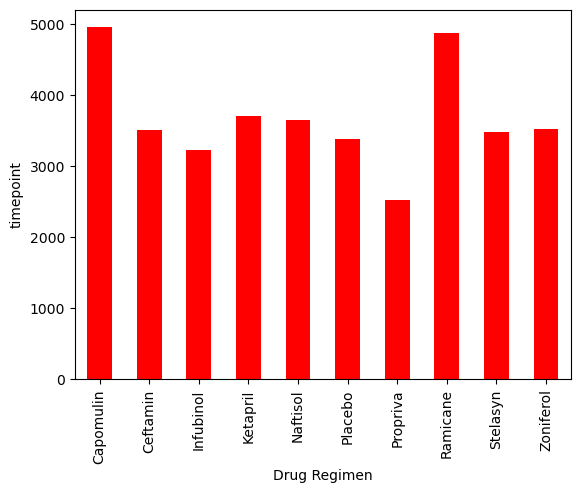

In [186]:
#bar by pandas
total_time=clean_data.groupby('Drug Regimen')['Timepoint'].sum()

total_time.plot(kind='bar',x='total_time.index',y='total_time.value_counts',color='red')

plt.xlabel('Drug Regimen')
plt.ylabel('timepoint')


plt.show()

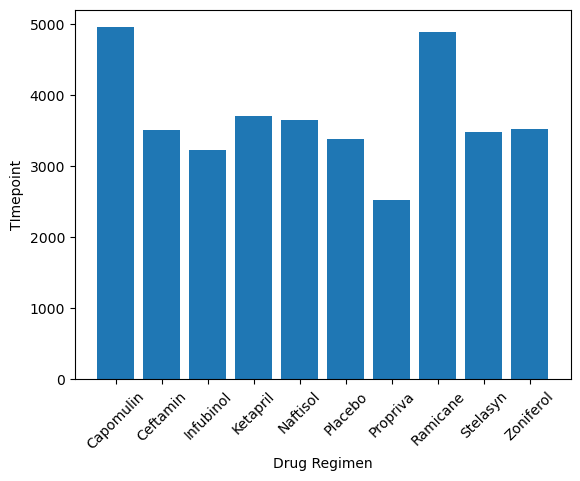

In [187]:
#bar by pyplot

total_time=clean_data.groupby('Drug Regimen')['Timepoint'].sum()

plt.bar(total_time.index, total_time.values)
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('TImepoint')
plt.show()


<AxesSubplot:title={'center':'sex distribution'}, ylabel='Count'>

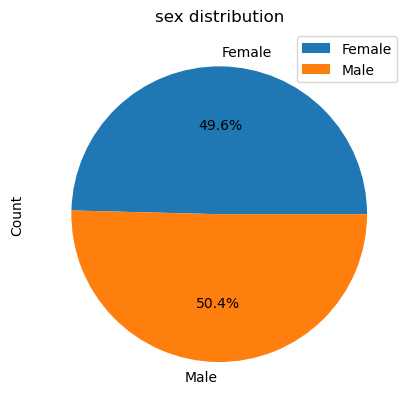

In [188]:
#pie by pandas

female_count = (clean_data_df == 'Female').sum().sum()
male_count = (clean_data_df == 'Male').sum().sum()
sex_count_1 = pd.DataFrame({'Count': [female_count, male_count]}, index=['Female', 'Male'])
label = ['female','male']
sex_count_1.plot(kind='pie',y='Count',title = 'sex distribution',autopct='%1.1f%%')

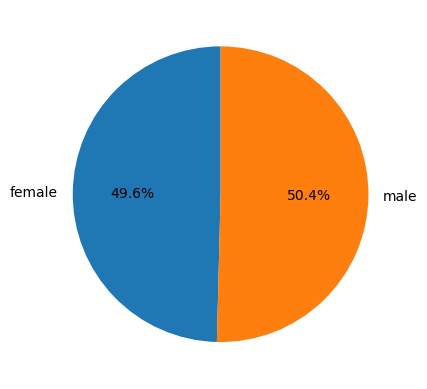

In [189]:
#pie by pyplot
female_count = (clean_data_df == 'Female').sum().sum()
male_count = (clean_data_df == 'Male').sum().sum()
sex_count = [female_count,male_count]
label = ['female','male']

plt.pie(sex_count,labels=label,autopct='%1.1f%%',startangle=90)
plt.show()

In [190]:
last_point = clean_data.groupby('Mouse ID').last().reset_index()
last_point

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [191]:
max_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].last().reset_index()
max_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [192]:
treatment_tumor=pd.DataFrame()

treatment_tumor['treatment']=last_point['Drug Regimen']
treatment_tumor['Tumor Volume (mm3)']=last_point['Tumor Volume (mm3)']



treatment_tumor=treatment_tumor.sort_values('treatment').reset_index()

treatment_tumor




,index,treatment,Tumor Volume (mm3)
0,66,Capomulin,40.159220
1,180,Capomulin,40.728578
2,183,Capomulin,34.455298
3,169,Capomulin,41.581521
4,163,Capomulin,32.377357
...,...,...,...
243,215,Zoniferol,68.401286
244,30,Zoniferol,64.575222
245,28,Zoniferol,67.942121
246,155,Zoniferol,68.611061


In [200]:



treatments_to_include = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


treatment_1 = treatment_tumor[treatment_tumor['treatment'].isin(treatments_to_include)]



treatment_1

,index,treatment,Tumor Volume (mm3)
0,66,Capomulin,40.159220
1,180,Capomulin,40.728578
2,183,Capomulin,34.455298
3,169,Capomulin,41.581521
4,163,Capomulin,32.377357
...,...,...,...
194,235,Ramicane,44.183451
195,177,Ramicane,30.276232
196,10,Ramicane,38.810366
197,52,Ramicane,40.659006


In [194]:
for treatment, locate_data in treatment_1.groupby('treatment'):
    Tumor_volume = locate_data['Tumor Volume (mm3)']

  
    q1 = Tumor_volume.quantile(0.25)
    q3 = Tumor_volume.quantile(0.75)
    iqr = q3 - q1
  
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
  
    outliers = Tumor_volume[(Tumor_volume < lower_bound) | (Tumor_volume > upper_bound)]

    locate_data = Tumor_volume.tolist()

   
   
    print(f"Outliers for {treatment}:")
    print(outliers)

Outliers for Capomulin:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol:
71    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ramicane:
Series([], Name: Tumor Volume (mm3), dtype: float64)


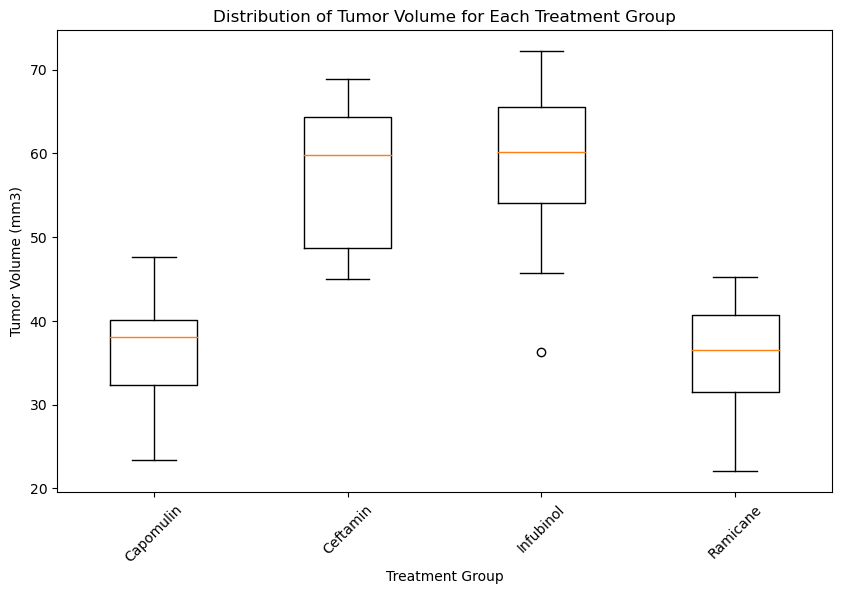

In [195]:
plt.figure(figsize=(10, 6))  
plt.boxplot([group['Tumor Volume (mm3)'] for treatment, group in treatment_1.groupby('treatment')],
            labels=[treatment for treatment, _ in treatment_1.groupby('treatment')])
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xticks(rotation=45)  

plt.show()


In [196]:
Capomulin_chart=pd.DataFrame()
Capomulin_chart['Timepoint']= clean_data[clean_data['Drug Regimen']=='Capomulin']['Timepoint']
Capomulin_chart['Tumor_volume']=clean_data['Tumor Volume (mm3)']
Capomulin_chart['Mouse ID']=clean_data['Mouse ID']
Capomulin_chart.reset_index()

,index,Timepoint,Tumor_volume,Mouse ID
0,10,0,45.000000,s185
1,11,5,43.878496,s185
2,12,10,37.614948,s185
3,13,15,38.177232,s185
4,14,20,36.866876,s185
...,...,...,...,...
225,440,45,47.685963,i557
226,1452,0,45.000000,r157
227,1453,5,45.597064,r157
228,1454,10,46.059608,r157


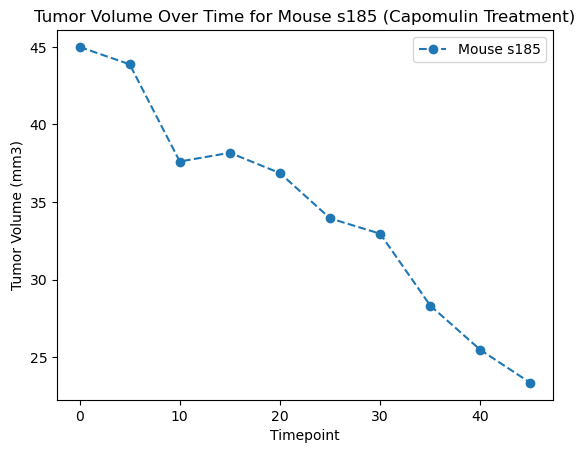

In [197]:


mouse_data = Capomulin_chart[Capomulin_chart['Mouse ID'] == 's185']


plt.plot(mouse_data['Timepoint'], mouse_data['Tumor_volume'], marker='o', linestyle='--', label='Mouse s185')


plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Over Time for Mouse s185 (Capomulin Treatment)')
plt.legend()


plt.show()


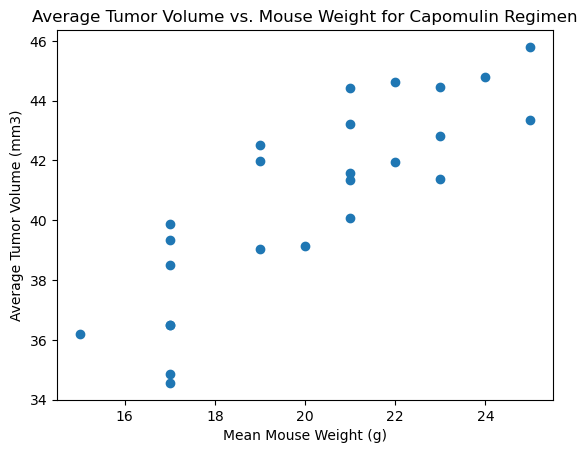

In [198]:
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']


mean_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()


combined_data = pd.merge(mean_tumor_volume, mouse_weight, on='Mouse ID')


plt.scatter(combined_data['Weight (g)'], combined_data['Tumor Volume (mm3)'])


plt.xlabel('Mean Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')


plt.show()


Correlation Coefficient: 0.8419363424694721


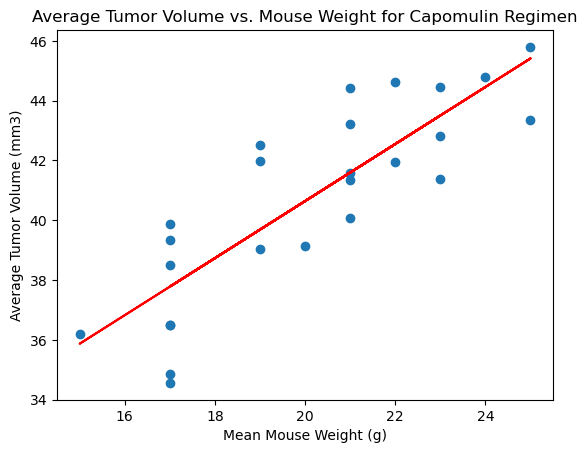

In [199]:

correlation_coefficient, p_value = st.pearsonr(mouse_weight, mean_tumor_volume)
print("Correlation Coefficient:", correlation_coefficient)


slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, mean_tumor_volume)


plt.scatter(mouse_weight, mean_tumor_volume)

regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='red')


plt.xlabel('Mean Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')

plt.show()
